In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

,count,mean,min,25%,50%,75%,max,std
loan_amnt,396030.0,14113.888089,500.0,8000.0,12000.0,20000.0,40000.0,8357.441341
term,396030.0,41.698053,36.0,36.0,36.0,36.0,60.0,10.212038
int_rate,396030.0,12.501757,0.6,9.67,12.99,15.88,30.99,5.398287
installment,396030.0,3931.407767,28.5,1992.6,3446.5,5390.6,15338.1,2641.294944
emp_length,377729.0,5.938578,0.0,3.0,6.0,10.0,10.0,3.645623
annual_inc,396030.0,77820.992684,0.0,45000.0,64635.0,90000.0,8706582.0,81375.729311
issue_d,396030,2013-08-23 23:26:25.898037760,2007-01-06 00:00:00,2013-01-05 00:00:00,2014-01-04 00:00:00,2015-01-03 00:00:00,2016-01-12 00:00:00,NaN
dti,396030.0,15.621021,0.0,8.81,15.52,22.09,999.9,9.252658
earliest_cr_line,396030,1998-09-27 10:20:21.180213760,1975-01-01 00:00:00,1994-01-12 00:00:00,1999-01-11 00:00:00,2003-01-06 00:00:00,2074-01-12 00:00:00,NaN
open_acc,396030.0,113.111532,0.0,80.0,100.0,140.0,900.0,51.376488


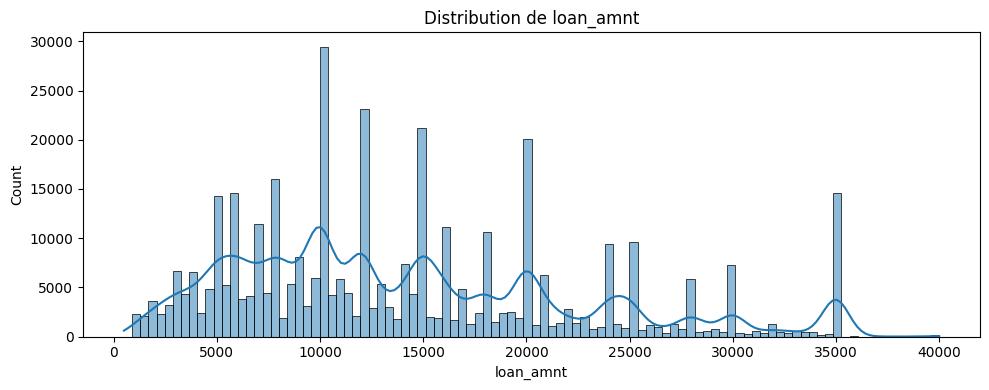

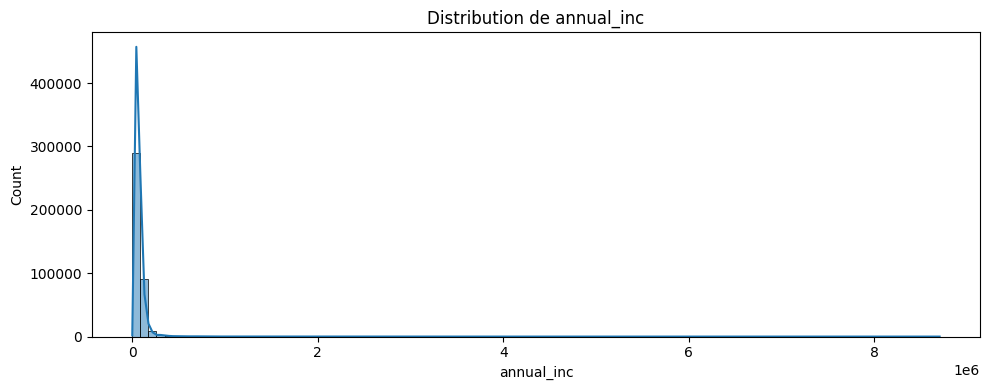

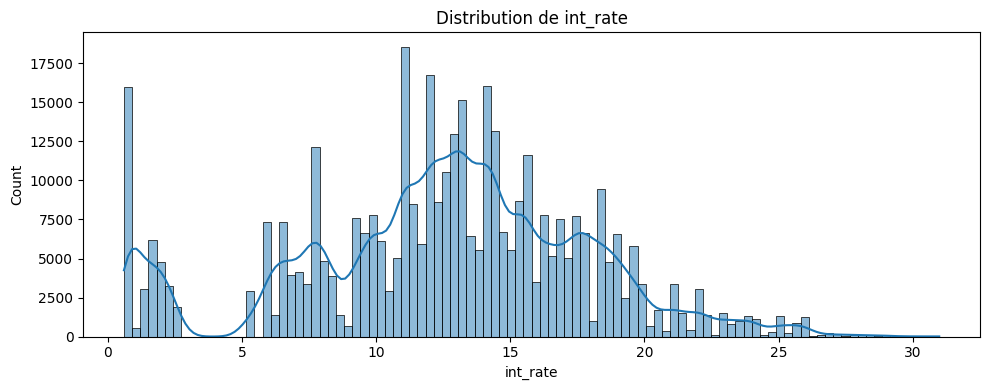

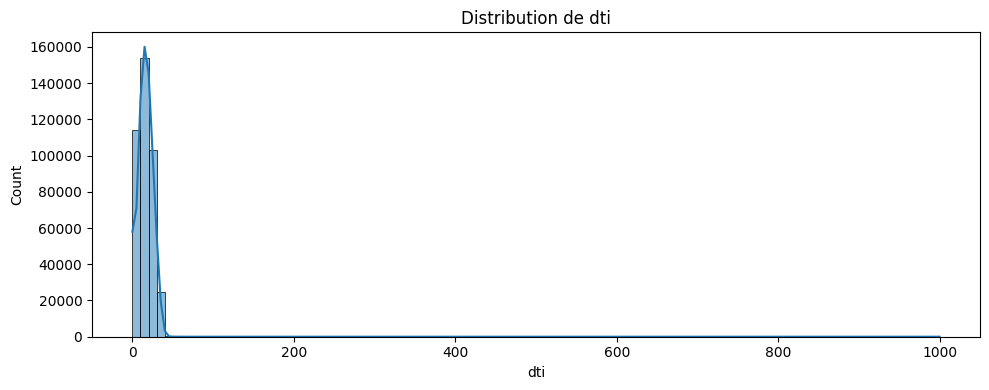

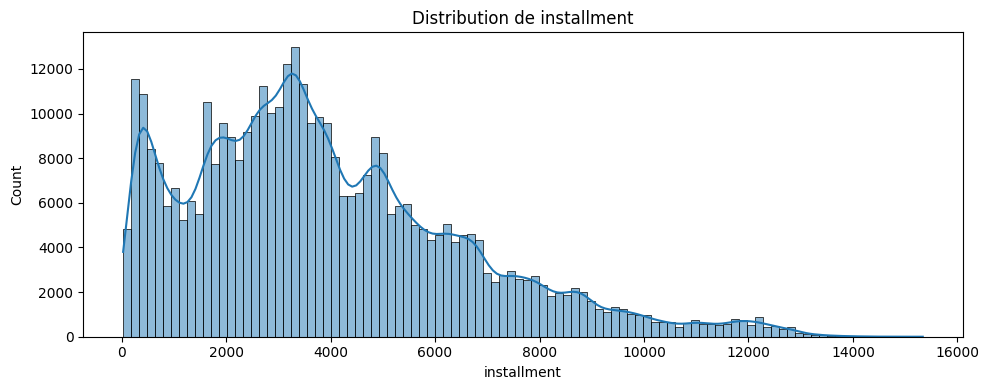

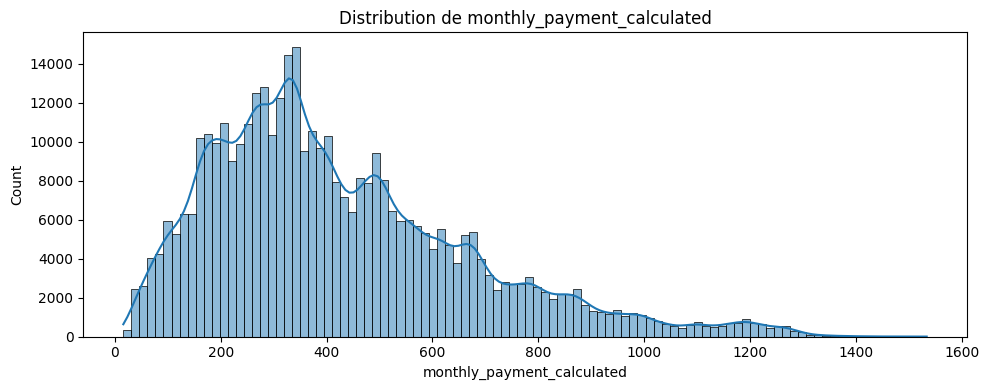

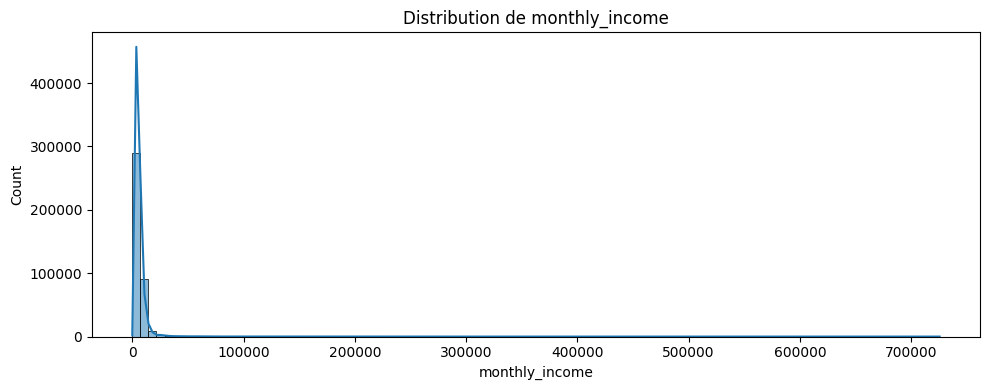

📌 Outliers par variable (au-delà du 99e ou en dessous du 1er percentile) :

loan_amnt → 4089 outliers (1.03%)
annual_inc → 7866 outliers (1.99%)
int_rate → 3606 outliers (0.91%)
dti → 7878 outliers (1.99%)
installment → 7821 outliers (1.97%)
monthly_payment_calculated → 7794 outliers (1.97%)
monthly_income → 7866 outliers (1.99%)


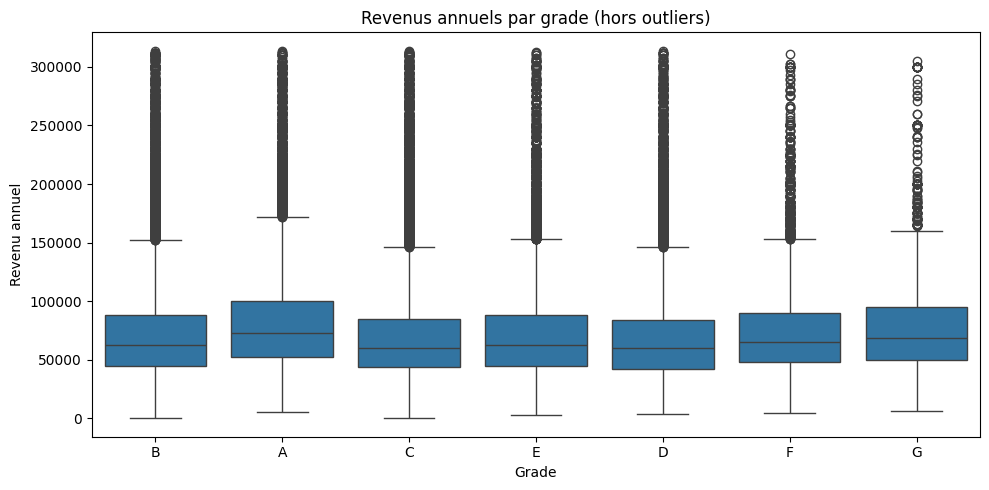


🔍 Proportion de lignes marquées comme outliers : 1.93%


In [14]:
# 🔹 Chargement
input_path = "../../data/cleaning/step7_revol_util_corrected.parquet"
df = pd.read_parquet(input_path)

# 📊 Résumé statistique global des variables numériques
display(df.describe().T)

# 📈 Visualisation des distributions (variables clés)
cols = ['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'installment', 'monthly_payment_calculated', 'monthly_income']
for col in cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], bins=100, kde=True)
    plt.title(f"Distribution de {col}")
    plt.tight_layout()
    plt.show()

# 📍 Détection des outliers par quantiles
print("📌 Outliers par variable (au-delà du 99e ou en dessous du 1er percentile) :\n")
for col in cols:
    q01 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    outliers = df[(df[col] < q01) | (df[col] > q99)]
    print(f"{col} → {len(outliers)} outliers ({100 * len(outliers)/len(df):.2f}%)")

# 🧮 Exemple de croisement : revenus extrêmes vs grade
df['is_outlier_annual_inc'] = df['annual_inc'] > df['annual_inc'].quantile(0.99)

plt.figure(figsize=(10, 5))
sns.boxplot(x='grade', y='annual_inc', data=df[df['is_outlier_annual_inc'] == False])
plt.title("Revenus annuels par grade (hors outliers)")
plt.xlabel("Grade")
plt.ylabel("Revenu annuel")
plt.tight_layout()
plt.show()

# ✅ Ajout d’un flag global pour outliers
df['is_outlier'] = (
    (df['loan_amnt'] > df['loan_amnt'].quantile(0.99)) |
    (df['annual_inc'] > df['annual_inc'].quantile(0.99)) |
    (df['int_rate'] > df['int_rate'].quantile(0.99)) |
    (df['monthly_income'] <= 0) |
    (df['installment'] <= 0)
)

# 🔎 Proportion de lignes suspectes
outlier_pct = df['is_outlier'].mean() * 100
print(f"\n🔍 Proportion de lignes marquées comme outliers : {outlier_pct:.2f}%")

In [15]:
# Définir les seuils d'outliers pour chaque variable
outlier_conditions = (
    (df['loan_amnt'] < df['loan_amnt'].quantile(0.01)) | (df['loan_amnt'] > df['loan_amnt'].quantile(0.99)) |
    (df['annual_inc'] < df['annual_inc'].quantile(0.01)) | (df['annual_inc'] > df['annual_inc'].quantile(0.99)) |
    (df['int_rate'] < df['int_rate'].quantile(0.01)) | (df['int_rate'] > df['int_rate'].quantile(0.99)) |
    (df['dti'] < df['dti'].quantile(0.01)) | (df['dti'] > df['dti'].quantile(0.99)) |
    (df['installment'] < df['installment'].quantile(0.01)) | (df['installment'] > df['installment'].quantile(0.99)) |
    (df['monthly_payment_calculated'] < df['monthly_payment_calculated'].quantile(0.01)) | (df['monthly_payment_calculated'] > df['monthly_payment_calculated'].quantile(0.99)) |
    (df['monthly_income'] < df['monthly_income'].quantile(0.01)) | (df['monthly_income'] > df['monthly_income'].quantile(0.99))
)

# Appliquer la condition
df['has_outlier'] = outlier_conditions

# Résultat global
nb_outlier_rows = df['has_outlier'].sum()
pct_outlier_rows = 100 * nb_outlier_rows / len(df)

print(f"📌 Nombre de lignes contenant au moins une valeur outlier : {nb_outlier_rows}")
print(f"📊 Cela représente {pct_outlier_rows:.2f}% du dataset.")

📌 Nombre de lignes contenant au moins une valeur outlier : 29816
📊 Cela représente 7.53% du dataset.
